In [7]:
import random
import numpy as np

class Dolphin:
    def __init__(self, name, sex, **kwargs):
        # Attributes relating to gender, parents, and name
        self.name = name
        self.sex = sex
        self.mother = kwargs["mother"] if "mother" in kwargs else None
        self.father = kwargs["father"] if "father" in kwargs else None

        # Attributes relating to procreation
        self.procreation_cooldown = 0
        # self.procreate = False

        # Attributes relating to age and death
        self.age = 0
        self.death_age = int(np.random.randn()*5 + 35)
        self.dead = False
        
        # Attributes relating to printing the progress of the population
        """
        TO SEE EACH DOLPHIN PROGRESS THROUGH THE TRIAL, ENABLE print_progress
        Do so at your own risk, for your computer may blow up!
        """
        self.print_progress = False


    def age_record(self):
        # Keeps track of the dolphin's age and years since procreation
        # and determines whether the dolphin dies.
        
        # Increment age
        self.age += 1
        
        # Check procreation rate
        self.procreation_cooldown -= 1
        if self.procreation_cooldown < 0:
            self.procreation_cooldown = 0
        
        # Did the dolphin reach the death age?
        if self.age >= self.death_age:
            self.dead = True
            return self.dead

    def request_procreation(self, dolphin_other):            
        """
        Procreation System of Checks and Balances
        """
        try:
            # Check: Is dolphin_other a parent of dolphin? If so, return False
            if self.mother == dolphin_other or self.father == dolphin_other:
                if self.print_progress:
                    print(f"GENEALOGY ERROR: {self.name}'s parent is {dolphin_other.name}.")
                return False
            
            # Check: Is dolphin a parnet of dolphin_other
            if dolphin_other.mother == self or dolphin_other.father == self:
                if self.print_progress:
                    print(f"GENEALOGY ERROR: {dolphin_other.name}'s parent is {self.name}.")
                return False
            # Check: Are the dolphins full siblings of each other
            if (dolphin_other.mother != None) and (self.mother != None) and (dolphin_other.father != None) and (self.father != None):
                if (dolphin_other.mother == self.mother) and (dolphin_other.father == self.father):
                    if self.print_progress:
                        print(f"FULL SIBLING ERROR: {dolphin_other.name} and {self.name} are full siblings")
                    return False
            
            # Check: Are both of the dolphins within ten years of each other in age?
            if abs(dolphin_other.age - self.age) > 10:
                if self.print_progress:
                    print(f"AGE DIFFERENCE ERROR: {dolphin_other.name} and {self.name} have too wide an age gap ({abs(dolphin_other.age - self.age)})")
                return False
            
            # Check: Can both of the dolphins procreate based on the conditions at the beginning of this method?
            if (self.age < 6) and (dolphin_other.age < 6):
                if self.print_progress:
                    print(f"MATURITY ERROR: {self.name}'s age: {self.age}, {dolphin_other.name}'s age: {dolphin_other.age}.")
                return False

            # Check: Dolphins produce no more than 1 calf per every 5 years. If a dolphin's birthing cooldown is not 0, return False
            if (self.procreation_cooldown != 0) and (dolphin_other.procreation_cooldown != 0):
                if self.print_progress:
                    print(f"COOLDOWN ERROR: {self.name}'s cooldown: {self.procreation_cooldown}, {dolphin_other.name}'s cooldown: {dolphin_other.procreation_cooldown}.")
                return False

            # If all checks pass, then create a new dolphin is a go. Return True
            if self.print_progress:
                print(f"{dolphin_other.name} and {self.name} can procreate.")
            dolphin_other.procreation_cooldown = 5
            self.procreation_cooldown = 5
            return True 

        except AttributeError:
            if self.print_progress:
                print(f"INIT DOLPHINS: {self.name} and {dolphin_other.name} are the initial dolphins of the population")
            if self.procreation_cooldown == 0 and dolphin_other.procreation_cooldown == 0:
                if self.print_progress:
                    print(f"{dolphin_other.name} and {self.name} can procreate.")
                dolphin_other.procreation_cooldown = 5
                self.procreation_cooldown = 5
                return True 
            
            

# Half sibling procreation:
# if (Mom A == Mom B) and (Dad A == Dad B) -> do not procreate
# otherwise, do procreate

Trial No. 0
MILESTONE: Entering year 0 with 4 total dolphins, with 0 breeding.
MILESTONE: Entering year 25 with 13 total dolphins, with 4 breeding.
MILESTONE: Entering year 50 with 103 total dolphins, with 16 breeding.
Freeborn's Family Tree
MILESTONE: Entering year 75 with 1134 total dolphins, with 240 breeding.
Trial No. 1
MILESTONE: Entering year 0 with 4 total dolphins, with 0 breeding.
MILESTONE: Entering year 25 with 15 total dolphins, with 4 breeding.
MILESTONE: Entering year 50 with 143 total dolphins, with 36 breeding.
Sena's Family Tree
MILESTONE: Entering year 75 with 1732 total dolphins, with 274 breeding.
Trial No. 2
MILESTONE: Entering year 0 with 4 total dolphins, with 0 breeding.
MILESTONE: Entering year 25 with 21 total dolphins, with 4 breeding.
MILESTONE: Entering year 50 with 122 total dolphins, with 20 breeding.
Mann IV's Family Tree
MILESTONE: Entering year 75 with 872 total dolphins, with 138 breeding.
Trial No. 3
MILESTONE: Entering year 0 with 4 total dolphins,

C:\Users\joebs\AppData\Local\Temp\ipykernel_29824\2185596021.py:282: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20, 10))


ValueError: operands could not be broadcast together with shapes (101,) (76,) 

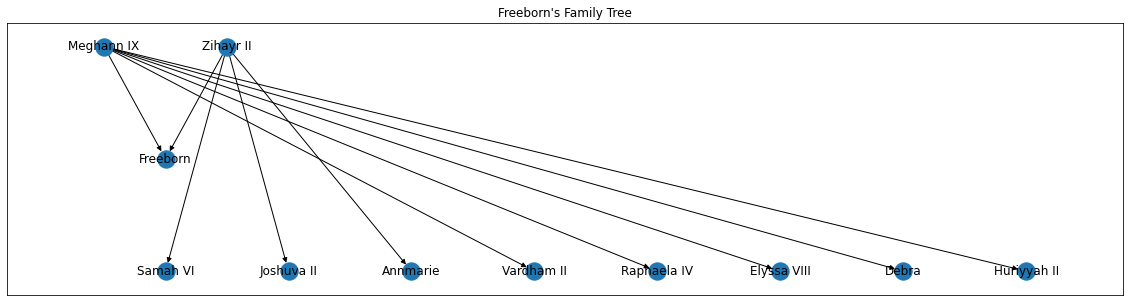

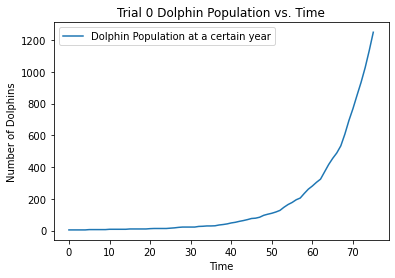

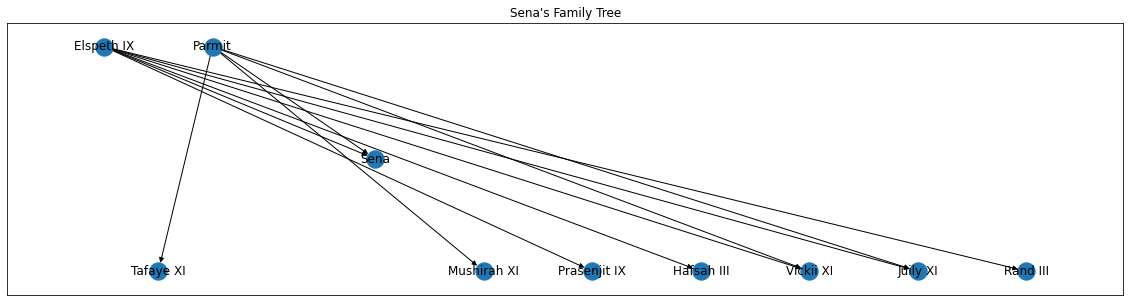

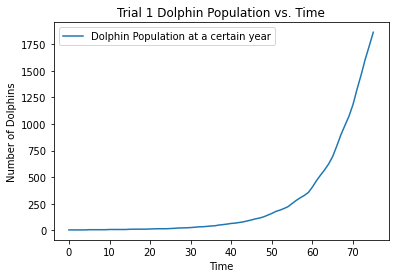

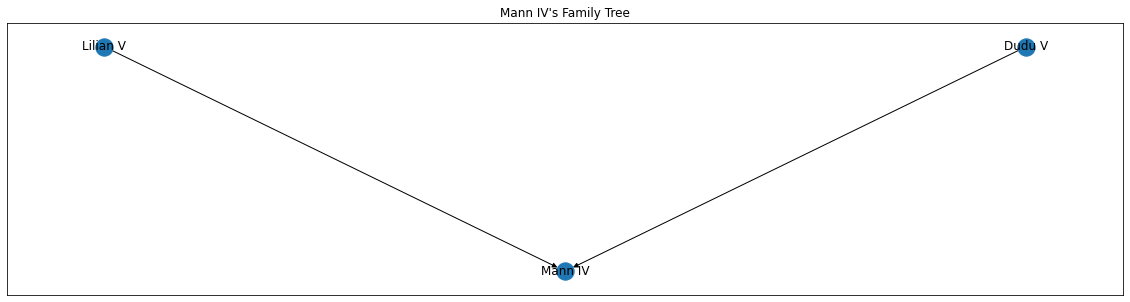

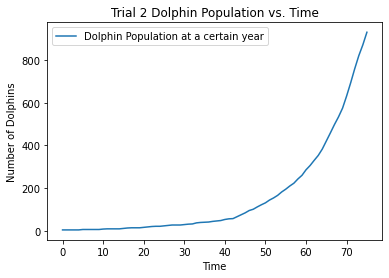

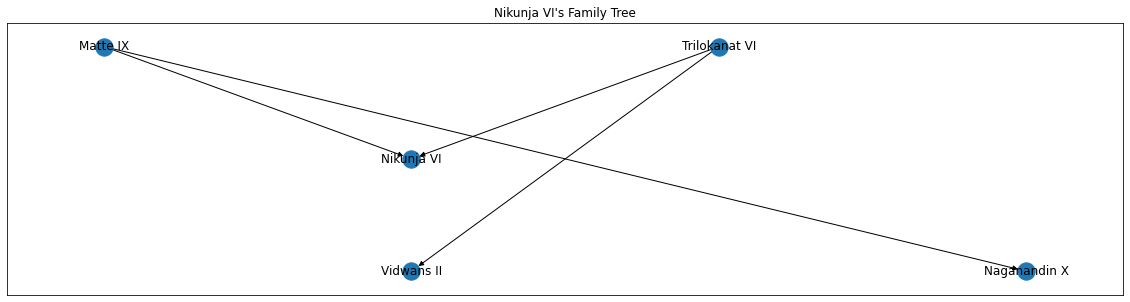

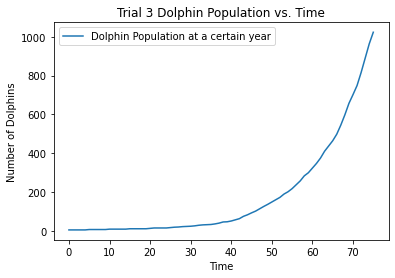

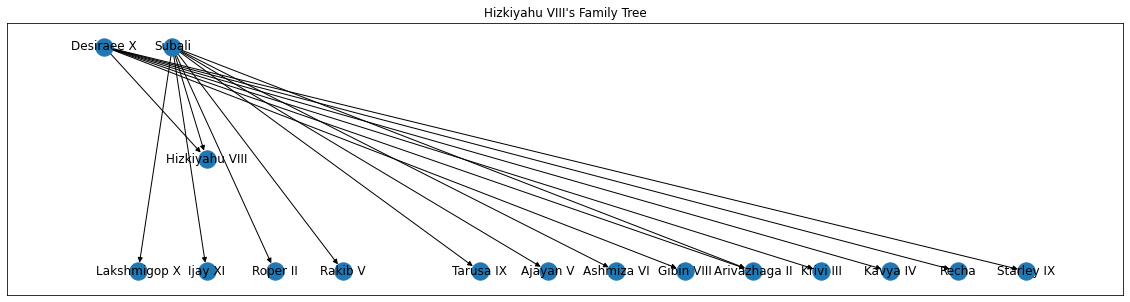

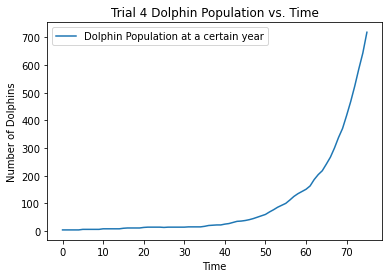

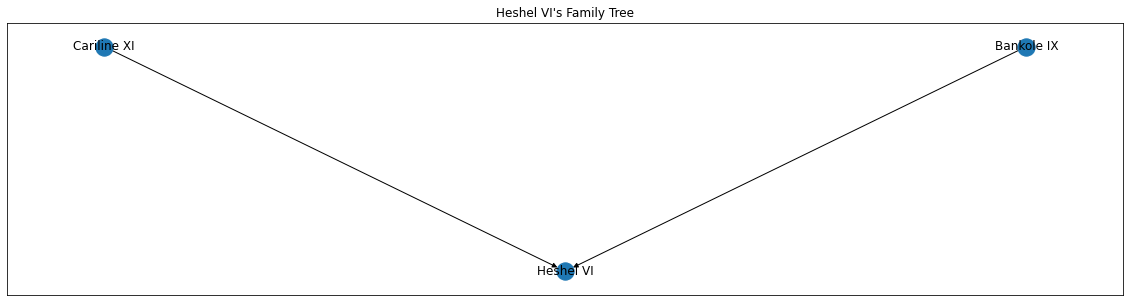

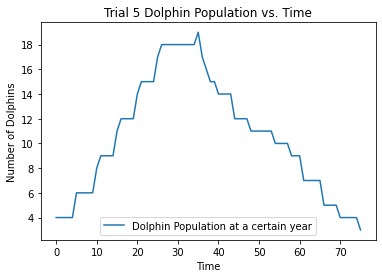

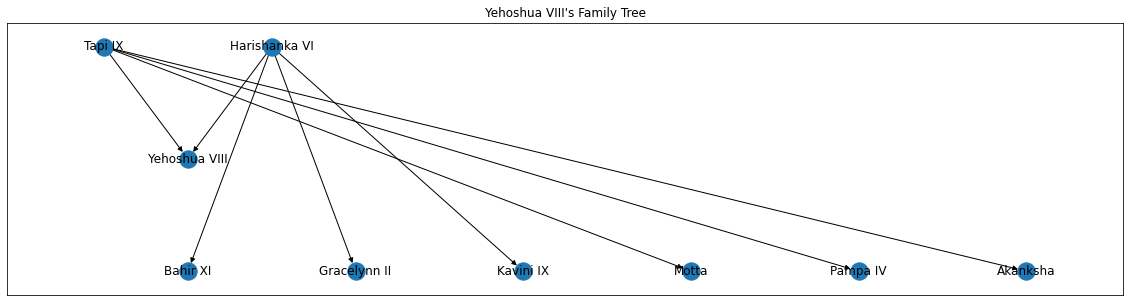

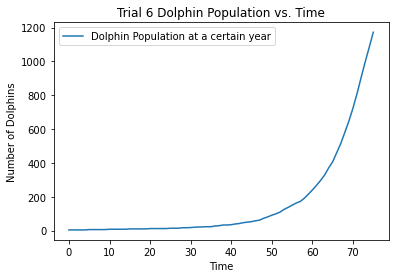

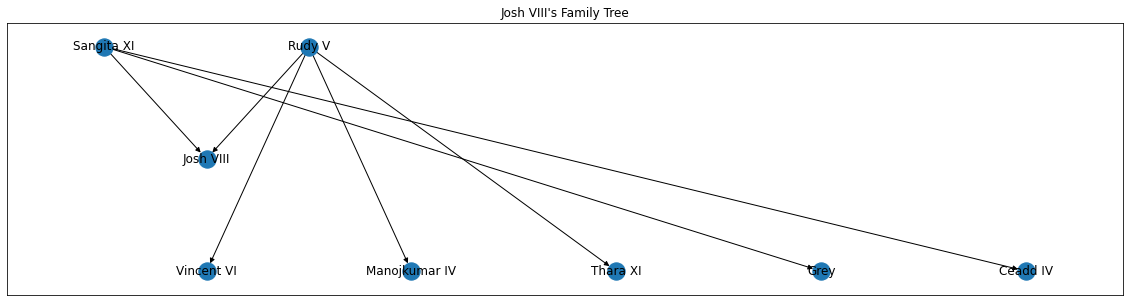

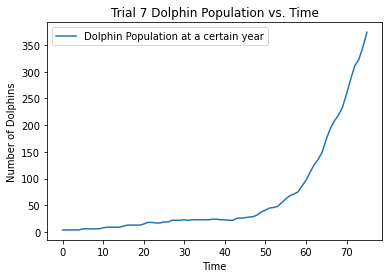

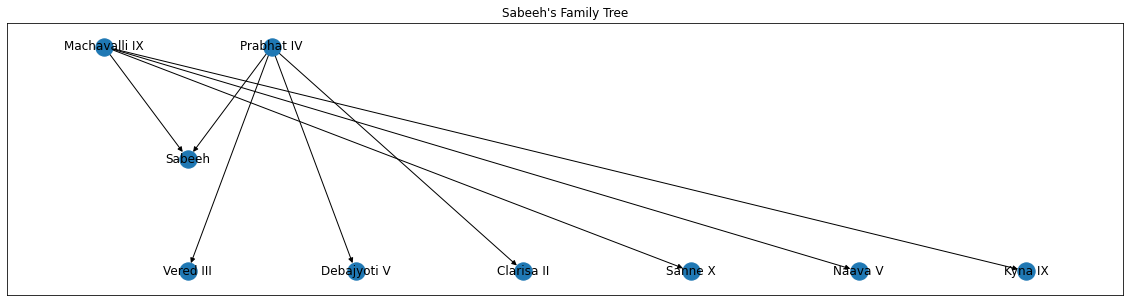

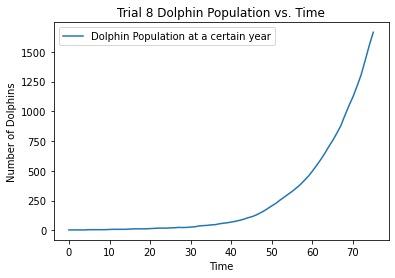

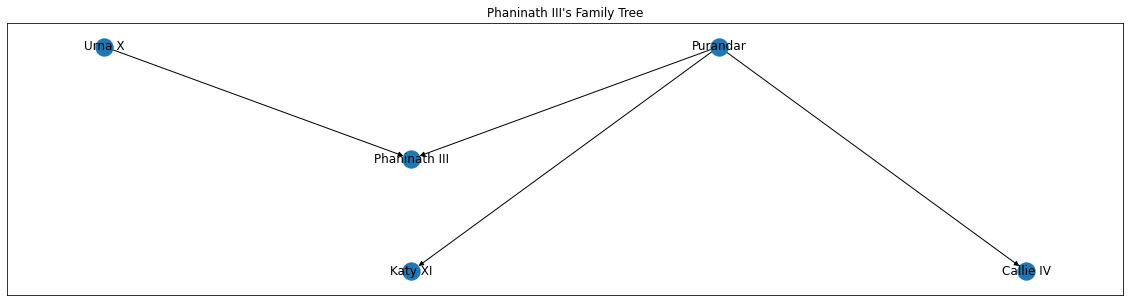

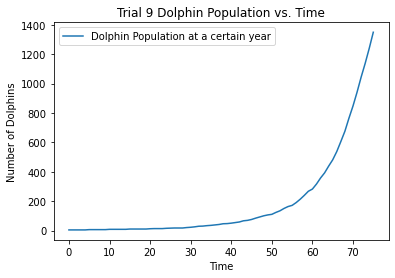

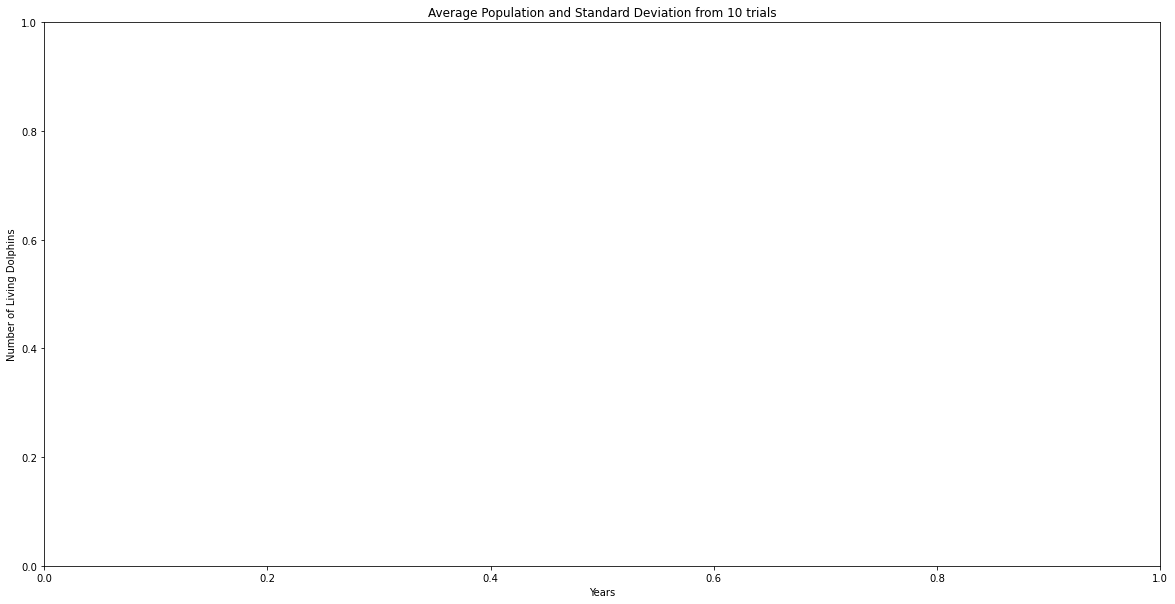

In [6]:
%matplotlib inline
import networkx as nx
import numpy as np
import random
from matplotlib import pyplot as plt


"""
Generate Names
"""
def generate_names():
    file = open("boy_names.dat", 'r')
    lines = file.readlines()
    file.close()
    boy_names = [name.strip("\n") for name in lines]
    random.shuffle(boy_names)

    # List of girl names
    file = open("girl_names.dat", 'r')
    lines = file.readlines()
    file.close()
    girl_names = [name.strip("\n") for name in lines]
    random.shuffle(girl_names)

    def name_generator(sex):
        # print(len(girl_names))
        if sex == "male":
            for name in boy_names:
                name = random.choice(boy_names)
                boy_names.remove(name)
                yield name
        elif sex == "female":
            for name in girl_names:
                name = random.choice(girl_names)
                girl_names.remove(name)
                yield name
                
    return name_generator('male'), name_generator('female')


"""
Trial Class
"""
class Trial:
    def __init__(self, trial):        
        # Attributes relating to the trial and names
        self.trial = trial
        self.trial_births = 0
        self.gen_boy_names, self.gen_girl_names = generate_names() 
        
        # Attributes relating to print_progress
        """
        TO SEE EACH DOLPHIN PROGRESS THROUGH THE TRIAL, ENABLE print_progress
        Do so at your own risk, for your computer may blow up!
        """
        self.print_progress = False
        
        # Attributes relating to time
        self.year = 0
        self.max_trial_year = 75
        self.dolphin_pop_points = list()
        
        # Attributes relating to dolphins
        self.male_dolphins = [Dolphin(next(self.gen_boy_names), 'male') for i in range(2)]
        self.female_dolphins = [Dolphin(next(self.gen_girl_names), 'female') for i in range(2)]
        self.total_dolphins = len(self.male_dolphins) + len(self.female_dolphins)
        self.all_dolphins = self.male_dolphins + self.female_dolphins
        self.P_male = 0.51
        self.P_female = 1- self.P_male
        self.dolphins_breeding = 0

    # Increment the trial year
    def increment(self):
        self.year += 1
        
    # Display the years
    def display_years(self):
            if self.print_progress:
                print(f"==========================================================")
                print(f"Entering year {self.year} with {self.total_dolphins} dolphins, with {self.dolphins_breeding} breeding.")
            important_years = [0, 25, 50, 75, 100, 125, 150]
            if self.year in important_years:
                print(f"==========================================================")
                print(f"MILESTONE: Entering year {self.year} with {self.total_dolphins} total dolphins, with {self.dolphins_breeding} breeding.")
                
    # DIsplay the important milestones
    def display_milestones(self):
        if self.year == 100:
            print(f"at the beginning of year 100, there are {self.total_dolphins} living dolphins")
            print(f"there have been {self.trial_births} births, in total")
    
    # Probability of the dolphin being male/female per trial
    def probablility(self):
        random_number = np.random.uniform(0, 1)
        if 0 < random_number <= self.P_female:
            return 'female'
        elif self.P_female < random_number < 1:
            return 'male'

    
    # Evolution of the dolphin population based on procreation probability
    def evolve(self):        
        """
        AGE RECORD
        """
        # Calling the age_record() method for each dolphin
        # what it includes: increment age, kill dolphin if age == death_age
        if self.print_progress:
            print()
            print(f"-----AGE RECORDS-----")
            print(f"Gender \t\t Name \t\t Age \t\t Cooldown \t\t Death age \t\t Time Until Death")
        males_copy = self.male_dolphins.copy()
        females_copy = self.female_dolphins.copy()
        for dolphin in females_copy:
            if dolphin.age_record():
                self.female_dolphins.remove(dolphin)
        for dolphin in males_copy:
            if dolphin.age_record():
                self.male_dolphins.remove(dolphin)
        # Print the age
        if self.print_progress:
            for dolphin in self.female_dolphins:
                print(f"{dolphin.sex[0].upper():<16} {dolphin.name:<15} {dolphin.age:<15} {dolphin.procreation_cooldown:<23} {dolphin.death_age:<23} {dolphin.death_age - dolphin.age:<23}")
            for dolphin in self.male_dolphins:
                print(f"{dolphin.sex[0].upper():<16} {dolphin.name:<15} {dolphin.age:<15} {dolphin.procreation_cooldown:<23} {dolphin.death_age:<23} {dolphin.death_age - dolphin.age:<23}")
    
        """
        REQUEST PROCREATION
        """
        total_dolphins = len(self.female_dolphins) + len(self.male_dolphins)
        
        # Making the dolphin pairs based on procreation eligibility
        males_copy = self.male_dolphins.copy()
        females_copy = self.female_dolphins.copy()
        eligible_males = males_copy.copy()
        eligible_females = females_copy.copy()
        eligible_pairs = list()
        pairs_list = list()
        
        # Use males_copy and females_copy as the pointers for the other lists.
        for dolphin in males_copy:
            if (dolphin.procreation_cooldown != 0) and (dolphin.age < 6):
                # If if a dolphin procreated recently and if the age of the dolphin is less than 6, then do not procreate
                eligible_males.remove(dolphin)
        for dolphin in females_copy:
            if (dolphin.procreation_cooldown != 0) and (dolphin.age < 6):
                eligible_females.remove(dolphin)
        for num in range(min(len(eligible_males), len(eligible_females))):
            dolphin_pair = eligible_males[num], eligible_females[num]
            eligible_pairs.append(dolphin_pair)
        # print(eligible_pairs)
        # print(dolphin_pair)

        if self.print_progress:
            print()
            print(f"------PROCREATION {self.year-1}------")
        have_kids = random.choice([True, False])
        for dolphin_pair in eligible_pairs:
            # if have_kids:
            if dolphin_pair[0].request_procreation(dolphin_pair[1]):

                self.dolphins_breeding += len(dolphin_pair)
                self.trial_births += 1

                # Get the gender of the new dolphin and add it to a list
                sex = self.probablility()
                if sex == 'female':
                    dolphin_spawn = Dolphin(next(self.gen_girl_names), sex, mother=dolphin_pair[1], father=dolphin_pair[0])
                    # print(len(girl_names))
                else:
                    dolphin_spawn = Dolphin(next(self.gen_boy_names), sex, mother=dolphin_pair[1], father=dolphin_pair[0])
                if self.print_progress:
                    print(f"\t\tnew {dolphin_spawn.sex} dolphin: {dolphin_spawn.name}")
                if dolphin_spawn.sex == 'female':
                    self.female_dolphins.append(dolphin_spawn)
                else:
                    self.male_dolphins.append(dolphin_spawn)
                
        
        self.display_years()
        self.display_milestones()
        
        # Reinitalize the dolphins_breeding counter to 0
        self.dolphins_breeding = 0
        
        # Find the total number of dolphins
        self.total_dolphins = len(self.male_dolphins) + len(self.female_dolphins)
        self.all_dolphins = self.male_dolphins + self.female_dolphins
        self.dolphin_pop_points.append(self.total_dolphins)
    
    # Poplulation vs time graph
    def show_graph(self):
        t = np.linspace(0, self.max_trial_year, self.max_trial_year+1)
        ft = np.array(self.dolphin_pop_points)
        # print(len(t), len(ft))
        plt.figure()
        plt.title(f"Trial {self.trial} Dolphin Population vs. Time")
        plt.xlabel("Time")
        plt.ylabel("Number of Dolphins")
        plt.plot(t, ft, '-', label="Dolphin Population at a certain year")
        plt.legend()
        # plt.show()
        
    # For some dolphin, find the genealogy using networkx package
    def family_tree(self, dolphin):
        dolphin = dolphin[0]
        full_siblings = list()
        half_siblings_mother = list()
        half_siblings_father = list()
        parents = [dolphin.mother.name, dolphin.father.name]
        
        print(f"{dolphin.name}'s Family Tree")
        for d in self.all_dolphins:
            if (d.mother == dolphin.mother) and (d.father == dolphin.father) and (d != dolphin) and (d != dolphin):
                full_siblings.append(d.name)
        for d in self.all_dolphins:
            if (d.mother == dolphin.mother) and (d not in full_siblings) and (d != dolphin):
                half_siblings_mother.append(d.name)
        for d in self.all_dolphins:
            if (d.father == dolphin.father) and (d not in full_siblings) and (d != dolphin):
                half_siblings_father.append(d.name)
        half_siblings = half_siblings_father + half_siblings_mother
            
        """
        Family Tree Graph
        """

        top_nodes = [x for x in parents]
        middle_nodes = [x for x in full_siblings] + [dolphin.name]
        bottom_nodes = half_siblings
        edges = [(parents[0], x) for x in half_siblings_mother] + [(parents[1], x) for x in half_siblings_father] + [(parents[1], x) for x in full_siblings] + \
                [(parents[0], x) for x in full_siblings] + [(parents[0], dolphin.name), (parents[1], dolphin.name)]
        
        G = nx.DiGraph(edges)
        pos = {n: (i, 2) for i, n in enumerate(top_nodes)}
        pos.update({n: (i + 0.5, 1) for i, n in enumerate(middle_nodes)})
        pos.update({n: (i + 0.5, 0) for i, n in enumerate(bottom_nodes)})
        
        plt.figure(figsize=(20, 5))
        nx.draw_networkx(G, pos, arrows=True, with_labels=True)
        plt.title(f"{dolphin.name}'s Family Tree")
        plt.savefig(f'genealogy.pdf')
        # plt.show()
        
    def trial_progress(self):
        print(f"Trial No. {self.trial}")
        while self.year <= self.max_trial_year:                
            self.evolve()
            self.increment()
            # if len(self.male_dolphins) == 0:
            #     print(f"Male Poplulation died")
            #     break
            # if len(self.female_dolphins) == 0:
            #     print(f"Female Population died")
            #     break
            if self.year == 70:
                self.family_tree(random.sample(self.male_dolphins, 1))
        self.show_graph()
    
    def get_data(self):
        self.trial_progress()
        # print(self.dolphin_pop_points)
        return self.dolphin_pop_points
        
        
"""
Main function
"""
if __name__ == "__main__":
    trial_max = 10
    data = [Trial(x).get_data() for x in range(0, trial_max)]
        
    # Average dolphins per year per trial
    average = np.mean(data, axis=0)
    
    # Standard deviation of dolphins per year per trial
    standard_deviation = np.std(data, axis=0)
    minus_sigma = average - standard_deviation
    plus_sigma = average + standard_deviation

    # Plot
    plt.figure(figsize=(20, 10))
    t = np.linspace(0, 100, 101)
    plt.xlabel("Years")
    plt.ylabel("Number of Living Dolphins")
    plt.title("Average Population and Standard Deviation from 10 trials")
    plt.fill_between(t, plus_sigma, minus_sigma, color=(1, 0, 0, 0.5))
    plt.plot(t, average, 'b')
    plt.savefig("population_growth.pdf")
    plt.show()